In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
file = 'Book1.csv' 

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-9',
 'confidence': 0.40675735780021943,
 'language': 'Turkish'}

In [4]:
ten = pd.read_csv(file,encoding='ISO-8859-9')
ten.head()

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,TB/S,Sets,Set W-L,S W%,Gms,Game W-L,G W%,Time/Mt,Min/Set,Sec/Pt
0,1,Novak DjokovicÊ[SRB],108.0,96-12,88.90%,68.30%,67.80%,725.0,8.60%,285.0,...,13.40%,305.0,241-64,79.00%,2713.0,1644-1069,60.60%,2:01,42.9,44.9
1,2,Daniil MedvedevÊ[RUS],113.0,90-23,79.60%,68.70%,67.30%,1016.0,12.60%,326.0,...,11.40%,299.0,218-81,72.90%,2720.0,1589-1131,58.40%,1:44,39.3,41.7
2,3,Alexander ZverevÊ[GER],112.0,86-26,76.80%,68.10%,67.80%,1123.0,13.00%,489.0,...,17.30%,313.0,224-89,71.60%,2890.0,1618-1272,56.00%,1:57,41.8,43.1
3,4,Rafael NadalÊ[ESP],63.0,51-12,81.00%,67.40%,67.60%,273.0,5.60%,145.0,...,13.10%,168.0,129-39,76.80%,1557.0,946-611,60.80%,2:09,48.5,50.0
4,5,Stefanos TsitsipasÊ[GRE],116.0,83-33,71.60%,69.10%,68.10%,781.0,8.90%,241.0,...,17.50%,309.0,208-101,67.30%,2877.0,1621-1256,56.30%,1:54,42.7,44.0


In [5]:
ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        51 non-null     object 
 1   Player    50 non-null     object 
 2   M         50 non-null     float64
 3   M W-L     50 non-null     object 
 4   M W%      50 non-null     object 
 5   SPW       50 non-null     object 
 6   SPW-InP   50 non-null     object 
 7   Aces      50 non-null     float64
 8   Ace%      50 non-null     object 
 9   DFs       50 non-null     float64
 10  DF%       50 non-null     object 
 11  DF/2s     50 non-null     object 
 12  1stIn     50 non-null     object 
 13  1st%      50 non-null     object 
 14  2nd%      50 non-null     object 
 15  2%-InP    50 non-null     object 
 16  Hld%      50 non-null     object 
 17  Pts/SG    50 non-null     float64
 18  PtsL/SG   50 non-null     float64
 19  RPW       50 non-null     object 
 20  RPW-InP   50 non-null     object 


In [6]:
#To remove the NA values
ten = ten.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(ten))

The total number of data-points after removing the rows with missing values are: 50


In [7]:
ten.describe()

,M,Aces,DFs,Pts/SG,PtsL/SG,Pts/RG,PtsW/RG,MdOppRk,MnOppRk,BPConv,...,BPvs/M,Bkn/S,Bkn/M,DR,Points,TBs,Sets,Gms,Min/Set,Sec/Pt
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,75.900000,490.260000,217.300000,6.330000,2.258000,6.472000,2.468000,53.130000,76.14400,230.860000,...,6.4580,0.913400,2.418000,1.078200,12113.240000,33.980000,200.620000,1896.420000,43.302000,42.936000
std,25.523299,323.079431,112.168105,0.198206,0.261932,0.167868,0.228964,12.678042,21.29579,95.457012,...,1.2164,0.215715,0.560863,0.096546,3905.103247,13.004693,66.474758,619.370717,2.365784,2.127925
min,13.000000,22.000000,24.000000,5.900000,1.700000,5.900000,1.700000,26.000000,46.50000,41.000000,...,3.9000,0.450000,1.200000,0.930000,2119.000000,2.000000,35.000000,314.000000,38.600000,37.700000
25%,65.500000,255.000000,146.500000,6.200000,2.025000,6.400000,2.400000,45.875000,62.55000,191.000000,...,5.5250,0.787500,2.100000,1.030000,10120.000000,26.250000,169.500000,1609.500000,41.800000,41.625000
50%,77.500000,353.000000,203.000000,6.300000,2.300000,6.500000,2.500000,51.000000,72.95000,224.000000,...,6.6000,0.920000,2.400000,1.065000,12409.000000,34.000000,202.500000,1934.500000,43.050000,43.050000
75%,88.000000,753.000000,262.000000,6.500000,2.475000,6.600000,2.600000,59.750000,82.60000,266.000000,...,7.5000,1.082500,2.875000,1.107500,14462.750000,44.500000,231.750000,2277.250000,45.075000,44.200000
max,126.000000,1168.000000,586.000000,6.800000,2.900000,7.000000,2.900000,81.000000,143.60000,448.000000,...,9.1000,1.270000,3.400000,1.360000,19527.000000,55.000000,324.000000,3094.000000,48.500000,50.000000


In [8]:
tenbreak1 = ten.drop(list(ten)[46:62], axis=1)

In [9]:
tenbreak = tenbreak1.drop(list(ten)[5:30], axis=1)

In [10]:
tenbreak.head()

,Rk,Player,M,M W-L,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,...,Bks/S,Bks/M,BPSvd%,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M
0,1,Novak DjokovicÊ[SRB],108.0,96-12,88.90%,44.20%,448.0,1014.0,0.76,3.3,...,1.47,4.1,67.30%,368.0,547.0,0.40,1.8,5.1,0.59,1.7
1,2,Daniil MedvedevÊ[RUS],113.0,90-23,79.60%,45.10%,408.0,904.0,0.67,3.0,...,1.36,3.6,62.20%,296.0,476.0,0.35,1.6,4.2,0.60,1.6
2,3,Alexander ZverevÊ[GER],112.0,86-26,76.80%,42.30%,395.0,933.0,0.64,3.0,...,1.26,3.5,60.50%,335.0,554.0,0.38,1.8,4.9,0.70,2.0
3,4,Rafael NadalÊ[ESP],63.0,51-12,81.00%,46.70%,267.0,572.0,0.75,3.4,...,1.59,4.2,66.60%,227.0,341.0,0.43,2.0,5.4,0.68,1.8
4,5,Stefanos TsitsipasÊ[GRE],116.0,83-33,71.60%,41.30%,340.0,823.0,0.58,2.7,...,1.10,2.9,64.40%,322.0,500.0,0.34,1.6,4.3,0.58,1.5


In [11]:
tenbreak = tenbreak[(tenbreak["M"]>50)]

In [12]:
tenbreak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 49
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       45 non-null     object 
 1   Player   45 non-null     object 
 2   M        45 non-null     float64
 3   M W-L    45 non-null     object 
 4   M W%     45 non-null     object 
 5   BPConv%  45 non-null     object 
 6   BPConv   45 non-null     float64
 7   BPChnc   45 non-null     float64
 8   BP/G     45 non-null     float64
 9   BP/S     45 non-null     float64
 10  BP/M     45 non-null     float64
 11  Bks/S    45 non-null     float64
 12  Bks/M    45 non-null     float64
 13  BPSvd%   45 non-null     object 
 14  BPSaved  45 non-null     float64
 15  BPvs     45 non-null     float64
 16  BPvs/G   45 non-null     float64
 17  BPvs/S   45 non-null     float64
 18  BPvs/M   45 non-null     float64
 19  Bkn/S    45 non-null     float64
 20  Bkn/M    45 non-null     float64
dtypes: float64(15), ob

In [13]:
tenbreak["Rk"] = pd.to_numeric(tenbreak["Rk"])
tenbreak["M"] = pd.to_numeric(tenbreak["M"])

In [14]:
#Get list of categorical variables
s = (tenbreak.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Player', 'M W-L', 'M W%', 'BPConv%', 'BPSvd%']


In [15]:
tenbreak['BPConv%'] = tenbreak['BPConv%'].str.rstrip('%').astype('float') / 100.0
tenbreak['BPSvd%'] = tenbreak['BPSvd%'].str.rstrip('%').astype('float') / 100.0
tenbreak['M W%'] = tenbreak['M W%'].str.rstrip('%').astype('float') / 100.0

In [16]:
tenbreak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 49
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       45 non-null     int64  
 1   Player   45 non-null     object 
 2   M        45 non-null     float64
 3   M W-L    45 non-null     object 
 4   M W%     45 non-null     float64
 5   BPConv%  45 non-null     float64
 6   BPConv   45 non-null     float64
 7   BPChnc   45 non-null     float64
 8   BP/G     45 non-null     float64
 9   BP/S     45 non-null     float64
 10  BP/M     45 non-null     float64
 11  Bks/S    45 non-null     float64
 12  Bks/M    45 non-null     float64
 13  BPSvd%   45 non-null     float64
 14  BPSaved  45 non-null     float64
 15  BPvs     45 non-null     float64
 16  BPvs/G   45 non-null     float64
 17  BPvs/S   45 non-null     float64
 18  BPvs/M   45 non-null     float64
 19  Bkn/S    45 non-null     float64
 20  Bkn/M    45 non-null     float64
dtypes: float64(18), in

In [17]:
tenbreak[['Wins', 'Losses']] = tenbreak['M W-L'].str.split('-', expand=True)
tenbreak = tenbreak.drop(['M W-L'], axis = 1)
tenbreak["Wins"] = pd.to_numeric(tenbreak["Wins"])
tenbreak["Losses"] = pd.to_numeric(tenbreak["Losses"])

In [18]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<AxesSubplot:>

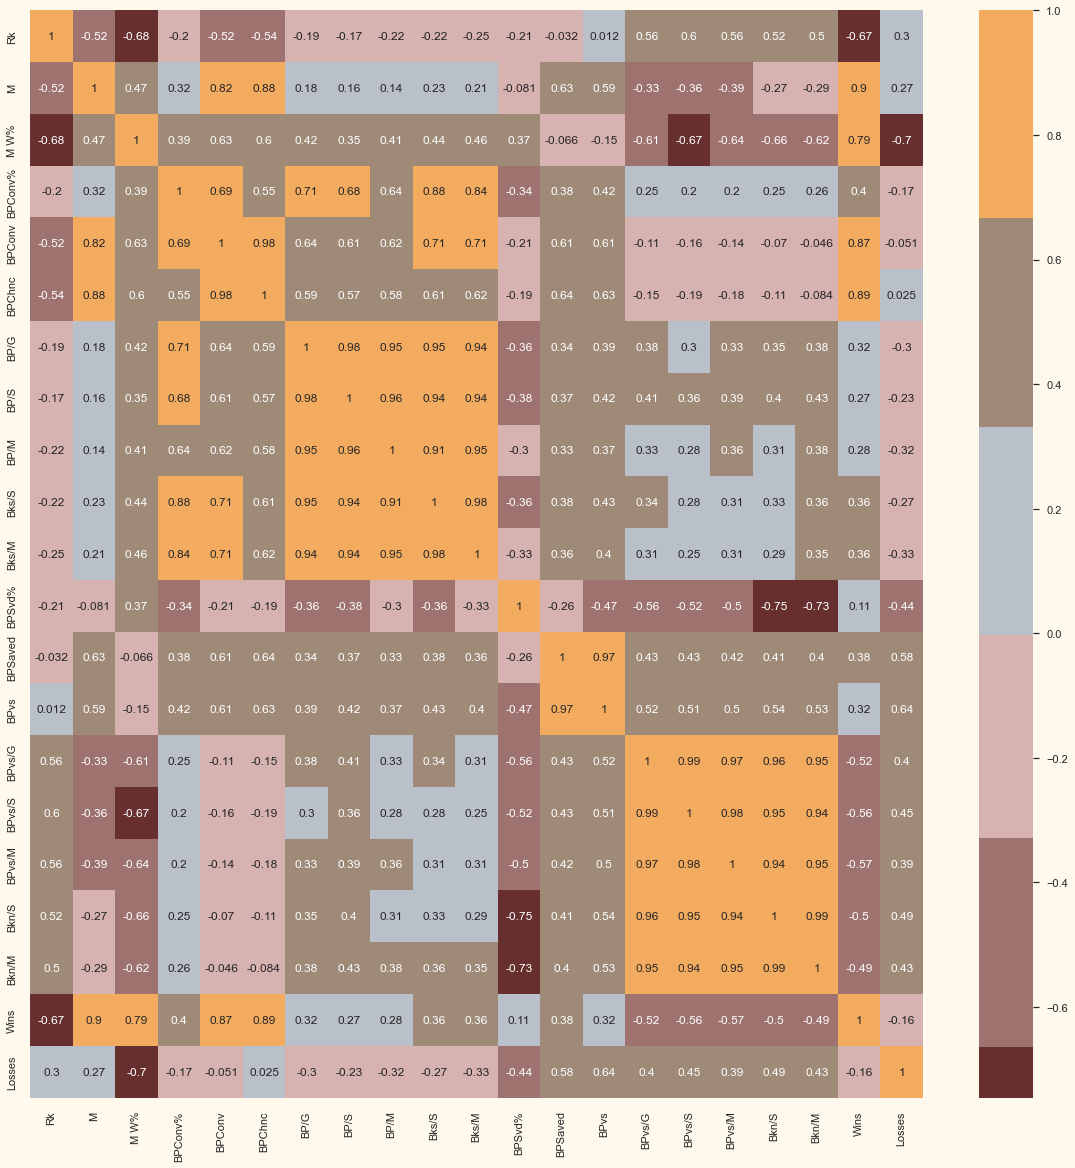

In [19]:
corrmat1= tenbreak.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat1,annot=True, cmap=cmap, center=0)

In [20]:
#Creating a copy of data
ds = tenbreak.copy()
# creating a subset of Player Names
cols_del = ['Player']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [21]:
scaled_ds.head()

,Rk,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,BP/M,Bks/S,...,BPSvd%,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses
0,-1.628824,1.458904,2.955240,1.062669,2.480417,2.466670,1.851711,1.347628,1.921576,1.513816,...,1.444116,0.738721,0.303298,-1.101457,-1.381313,-1.079685,-1.487993,-1.228292,2.639491,-2.584980
1,-1.556467,1.741151,1.991875,1.320536,1.980557,1.797848,0.845076,0.542629,0.597076,1.009889,...,-0.184506,-0.405379,-0.362707,-1.604150,-1.831741,-1.852251,-1.440905,-1.408923,2.292189,-1.145649
2,-1.484111,1.684702,1.701830,0.518282,1.818102,1.974173,0.509531,0.542629,0.880898,0.551774,...,-0.727380,0.214342,0.368960,-1.302534,-1.381313,-1.251366,-0.970021,-0.686398,2.060655,-0.753104
3,-1.411754,-1.081320,2.136898,1.778967,0.218550,-0.220779,1.739862,1.615961,1.637755,2.063554,...,1.220580,-1.501807,-1.629054,-0.799841,-0.930885,-0.822163,-1.064198,-1.047661,0.034730,-2.584980
4,-1.339398,1.910499,1.163174,0.231762,1.130795,1.305351,-0.161559,-0.262370,-0.254388,-0.181210,...,0.518037,0.007769,-0.137578,-1.704689,-1.831741,-1.766410,-1.535082,-1.589554,1.887004,0.162833


In [22]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,45.0,-7.154771e-17,2.970604,-6.537363,-1.717111,-0.213158,1.067695,10.811255
col2,45.0,3.355341e-16,2.741181,-4.584757,-1.683730,-0.242883,0.699311,7.123708
col3,45.0,-6.167906e-17,1.764432,-3.441438,-0.928112,-0.343077,0.662246,5.177260


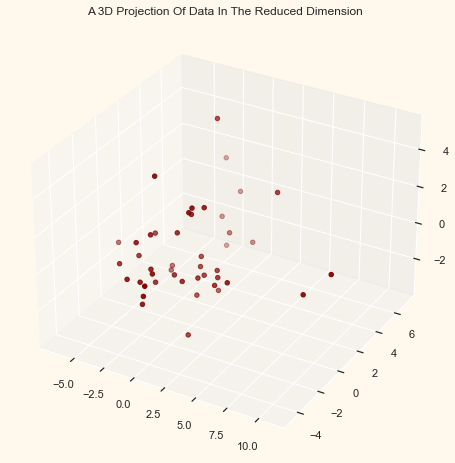

In [23]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


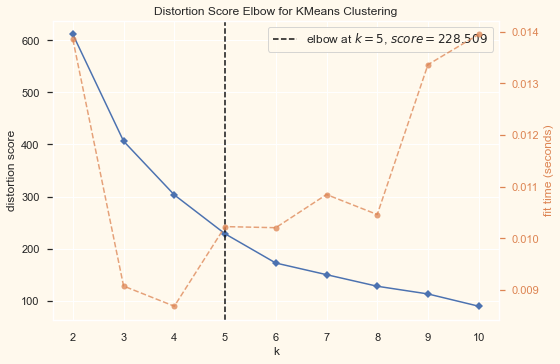

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [25]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
tenbreak["Clusters"]= yhat_AC

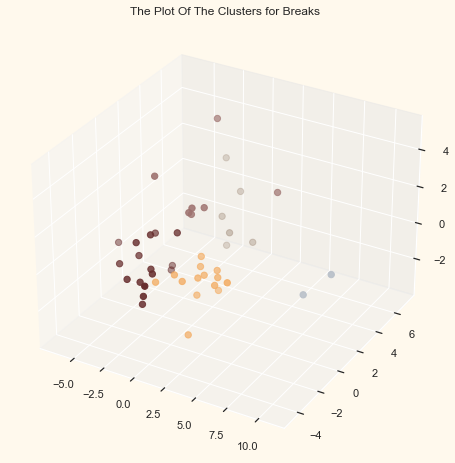

In [44]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters for Breaks")
plt.show()

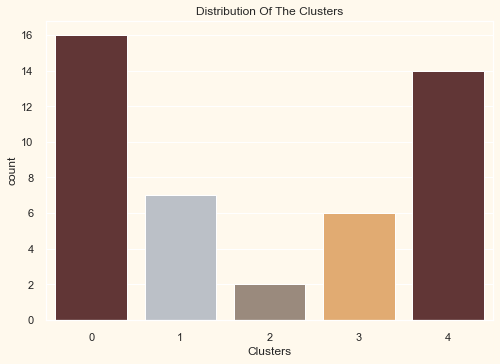

In [29]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=tenbreak["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

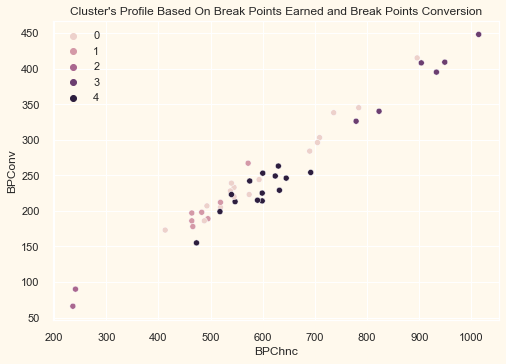

In [41]:
pl = sns.scatterplot(data = tenbreak,x=tenbreak["BPChnc"], y=tenbreak["BPConv"],hue=tenbreak["Clusters"])
pl.set_title("Cluster's Profile Based On Break Points Earned and Break Points Conversion")
plt.legend()
plt.show()

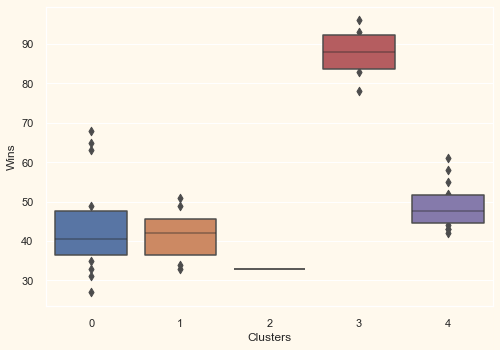

In [40]:
pl=sns.boxenplot(x=tenbreak["Clusters"], y=tenbreak["Wins"])
plt.show()

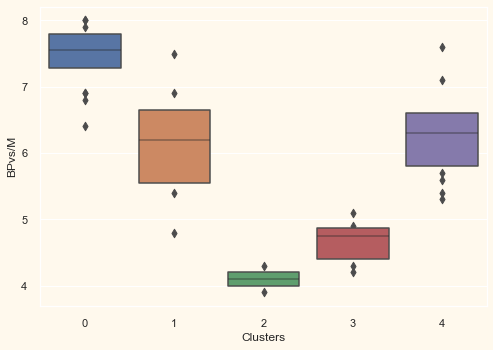

In [42]:
pl=sns.boxenplot(x=tenbreak["Clusters"], y=tenbreak["BPvs/M"])
plt.show()

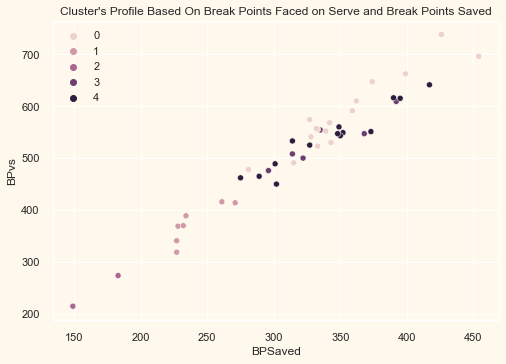

In [43]:
pl = sns.scatterplot(data = tenbreak,x=tenbreak["BPSaved"], y=tenbreak["BPvs"],hue=tenbreak["Clusters"])
pl.set_title("Cluster's Profile Based On Break Points Faced on Serve and Break Points Saved")
plt.legend()
plt.show()

In [31]:
playername = ten[['Player']]
final = pd.concat([playername, tenbreak], axis=1, sort=False)

In [32]:
final[final['Clusters']==0]

,Player,Rk,Player,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,...,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses,Clusters
10,Cameron NorrieÊ[GBR],11.0,Cameron NorrieÊ[GBR],104.0,0.625,0.440,345.0,784.0,0.62,2.9,...,399.0,662.0,0.52,2.5,6.4,0.99,2.5,65.0,39.0,0.0
11,Jannik SinnerÊ[ITA],12.0,Jannik SinnerÊ[ITA],102.0,0.667,0.459,338.0,736.0,0.60,2.9,...,454.0,696.0,0.56,2.7,6.8,0.94,2.4,68.0,34.0,0.0
14,Diego SchwartzmanÊ[ARG],15.0,Diego SchwartzmanÊ[ARG],100.0,0.630,0.463,415.0,896.0,0.75,3.4,...,426.0,738.0,0.62,2.8,7.4,1.18,3.1,63.0,37.0,0.0
18,Roberto Bautista AgutÊ[ESP],19.0,Roberto Bautista AgutÊ[ESP],82.0,0.598,0.427,303.0,709.0,0.67,3.2,...,342.0,568.0,0.54,2.6,6.9,1.02,2.8,49.0,33.0,0.0
19,Nikoloz BasilashviliÊ[GEO],20.0,Nikoloz BasilashviliÊ[GEO],78.0,0.474,0.395,205.0,519.0,0.59,2.7,...,327.0,574.0,0.66,2.9,7.4,1.27,3.2,37.0,41.0,0.0
21,Grigor DimitrovÊ[BUL],22.0,Grigor DimitrovÊ[BUL],71.0,0.592,0.428,233.0,545.0,0.62,2.9,...,315.0,491.0,0.55,2.6,6.9,0.94,2.5,42.0,29.0,0.0
23,Alex De MinaurÊ[AUS],24.0,Alex De MinaurÊ[AUS],73.0,0.521,0.424,228.0,538.0,0.59,2.8,...,339.0,552.0,0.61,2.9,7.6,1.12,2.9,38.0,35.0,0.0
27,Alejandro Davidovich FokinaÊ[ESP],28.0,Alejandro Davidovich FokinaÊ[ESP],82.0,0.561,0.412,284.0,690.0,0.69,3.2,...,374.0,647.0,0.65,3.0,7.9,1.25,3.3,46.0,36.0,0.0
29,Cristian GarinÊ[CHI],30.0,Cristian GarinÊ[CHI],69.0,0.565,0.411,244.0,593.0,0.65,3.1,...,333.0,555.0,0.60,2.9,8.0,1.15,3.2,39.0,30.0,0.0
30,Albert RamosÊ[ESP],31.0,Albert RamosÊ[ESP],72.0,0.458,0.404,220.0,545.0,0.59,2.9,...,332.0,557.0,0.60,2.9,7.7,1.18,3.1,33.0,39.0,0.0


In [33]:
final[final['Clusters']==1]

,Player,Rk,Player,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,...,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses,Clusters
3,Rafael NadalÊ[ESP],4.0,Rafael NadalÊ[ESP],63.0,0.810,0.467,267.0,572.0,0.75,3.4,...,227.0,341.0,0.43,2.0,5.4,0.68,1.8,51.0,12.0,1.0
5,Matteo BerrettiniÊ[ITA],6.0,Matteo BerrettiniÊ[ITA],67.0,0.731,0.382,189.0,495.0,0.53,2.6,...,227.0,319.0,0.34,1.7,4.8,0.48,1.4,49.0,18.0,1.0
8,Carlos AlcarazÊ[ESP],9.0,Carlos AlcarazÊ[ESP],52.0,0.635,0.425,197.0,464.0,0.71,3.3,...,234.0,389.0,0.60,2.7,7.5,1.09,3.0,33.0,19.0,1.0
20,Gael MonfilsÊ[FRA],21.0,Gael MonfilsÊ[FRA],58.0,0.586,0.382,178.0,466.0,0.65,3.1,...,228.0,369.0,0.51,2.4,6.4,0.93,2.4,34.0,24.0,1.0
32,Aslan KaratsevÊ[RUS],33.0,Aslan KaratsevÊ[RUS],67.0,0.627,0.408,212.0,519.0,0.65,3.0,...,261.0,416.0,0.52,2.4,6.2,0.89,2.3,42.0,25.0,1.0
36,Sebastian KordaÊ[USA],37.0,Sebastian KordaÊ[USA],60.0,0.650,0.401,186.0,464.0,0.64,2.9,...,271.0,414.0,0.56,2.6,6.9,0.89,2.4,39.0,21.0,1.0
43,Ilya IvashkaÊ[BLR],44.0,Ilya IvashkaÊ[BLR],65.0,0.646,0.410,198.0,483.0,0.64,3.0,...,232.0,370.0,0.48,2.3,5.7,0.85,2.1,42.0,23.0,1.0


In [34]:
final[final['Clusters']==2]

,Player,Rk,Player,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,...,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses,Clusters
16,Reilly OpelkaÊ[USA],17.0,Reilly OpelkaÊ[USA],63.0,0.524,0.373,90.0,241.0,0.29,1.5,...,183.0,274.0,0.33,1.7,4.3,0.56,1.4,33.0,30.0,2.0
24,John IsnerÊ[USA],25.0,John IsnerÊ[USA],55.0,0.600,0.280,66.0,236.0,0.31,1.6,...,149.0,215.0,0.28,1.5,3.9,0.45,1.2,33.0,22.0,2.0


In [35]:
final[final['Clusters']==3]

,Player,Rk,Player,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,...,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses,Clusters
0,Novak DjokovicÊ[SRB],1.0,Novak DjokovicÊ[SRB],108.0,0.889,0.442,448.0,1014.0,0.76,3.3,...,368.0,547.0,0.40,1.8,5.1,0.59,1.7,96.0,12.0,3.0
1,Daniil MedvedevÊ[RUS],2.0,Daniil MedvedevÊ[RUS],113.0,0.796,0.451,408.0,904.0,0.67,3.0,...,296.0,476.0,0.35,1.6,4.2,0.60,1.6,90.0,23.0,3.0
2,Alexander ZverevÊ[GER],3.0,Alexander ZverevÊ[GER],112.0,0.768,0.423,395.0,933.0,0.64,3.0,...,335.0,554.0,0.38,1.8,4.9,0.70,2.0,86.0,26.0,3.0
4,Stefanos TsitsipasÊ[GRE],5.0,Stefanos TsitsipasÊ[GRE],116.0,0.716,0.413,340.0,823.0,0.58,2.7,...,322.0,500.0,0.34,1.6,4.3,0.58,1.5,83.0,33.0,3.0
6,Casper RuudÊ[NOR],7.0,Casper RuudÊ[NOR],108.0,0.722,0.418,326.0,779.0,0.62,2.9,...,314.0,508.0,0.40,1.9,4.7,0.72,1.8,78.0,30.0,3.0
7,Andrey RublevÊ[RUS],8.0,Andrey RublevÊ[RUS],126.0,0.738,0.431,409.0,949.0,0.62,2.9,...,392.0,609.0,0.39,1.9,4.8,0.67,1.7,93.0,33.0,3.0


In [36]:
final[final['Clusters']==4]

,Player,Rk,Player,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,...,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses,Clusters
9,Felix Auger AliassimeÊ[CAN],10.0,Felix Auger AliassimeÊ[CAN],103.0,0.592,0.367,254.0,692.0,0.55,2.7,...,349.0,560.0,0.44,2.1,5.4,0.81,2.0,61.0,42.0,4.0
12,Taylor FritzÊ[USA],13.0,Taylor FritzÊ[USA],85.0,0.565,0.362,229.0,632.0,0.55,2.7,...,327.0,525.0,0.46,2.3,6.2,0.86,2.3,48.0,37.0,4.0
13,Hubert HurkaczÊ[POL],14.0,Hubert HurkaczÊ[POL],87.0,0.586,0.376,225.0,599.0,0.55,2.6,...,301.0,489.0,0.44,2.1,5.6,0.82,2.2,51.0,36.0,4.0
15,Denis ShapovalovÊ[CAN],16.0,Denis ShapovalovÊ[CAN],84.0,0.560,0.381,246.0,645.0,0.58,2.8,...,373.0,551.0,0.49,2.4,6.6,0.78,2.1,47.0,37.0,4.0
17,Pablo Carreno BustaÊ[ESP],18.0,Pablo Carreno BustaÊ[ESP],88.0,0.659,0.399,249.0,624.0,0.61,2.7,...,352.0,549.0,0.53,2.4,6.2,0.85,2.2,58.0,30.0,4.0
22,Marin CilicÊ[CRO],23.0,Marin CilicÊ[CRO],82.0,0.573,0.357,214.0,599.0,0.57,2.7,...,350.0,543.0,0.51,2.4,6.6,0.86,2.4,47.0,35.0,4.0
25,Karen KhachanovÊ[RUS],26.0,Karen KhachanovÊ[RUS],94.0,0.585,0.417,263.0,630.0,0.52,2.4,...,395.0,615.0,0.51,2.3,6.5,0.84,2.3,55.0,39.0,4.0
26,Lorenzo SonegoÊ[ITA],27.0,Lorenzo SonegoÊ[ITA],82.0,0.524,0.384,199.0,518.0,0.52,2.5,...,289.0,465.0,0.46,2.2,5.7,0.84,2.1,43.0,39.0,4.0
28,Frances TiafoeÊ[USA],29.0,Frances TiafoeÊ[USA],77.0,0.545,0.389,213.0,547.0,0.54,2.6,...,348.0,547.0,0.53,2.6,7.1,0.95,2.6,42.0,35.0,4.0
31,Alexander BublikÊ[KAZ],32.0,Alexander BublikÊ[KAZ],97.0,0.515,0.364,215.0,590.0,0.51,2.5,...,417.0,641.0,0.55,2.7,6.6,0.94,2.3,50.0,47.0,4.0


In [38]:
tenbreak.describe()

,Rk,M,M W%,BPConv%,BPConv,BPChnc,BP/G,BP/S,BP/M,Bks/S,...,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,Wins,Losses,Clusters
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000
mean,23.511111,82.155556,0.603711,0.404911,249.511111,608.311111,0.594444,2.797778,7.368889,1.139556,...,321.511111,514.666667,0.509556,2.413333,6.357778,0.906000,2.38000,50.400000,31.755556,1.888889
std,13.976640,17.915148,0.097627,0.035296,80.926628,166.326735,0.090417,0.376882,1.068946,0.220752,...,63.642689,107.810440,0.100588,0.449039,1.178113,0.214766,0.55987,17.471275,7.728800,1.734964
min,1.000000,52.000000,0.443000,0.280000,66.000000,236.000000,0.290000,1.500000,3.800000,0.450000,...,149.000000,215.000000,0.280000,1.500000,3.900000,0.450000,1.20000,27.000000,12.000000,0.000000
25%,12.000000,69.000000,0.545000,0.382000,205.000000,518.000000,0.550000,2.700000,6.900000,1.000000,...,289.000000,465.000000,0.440000,2.100000,5.400000,0.780000,2.00000,39.000000,28.000000,0.000000
50%,23.000000,82.000000,0.586000,0.412000,229.000000,575.000000,0.590000,2.800000,7.400000,1.170000,...,332.000000,541.000000,0.520000,2.400000,6.500000,0.890000,2.40000,46.000000,34.000000,1.000000
75%,34.000000,94.000000,0.646000,0.424000,284.000000,692.000000,0.650000,3.000000,7.800000,1.260000,...,359.000000,568.000000,0.600000,2.800000,7.400000,1.060000,2.80000,55.000000,37.000000,4.000000
max,50.000000,126.000000,0.889000,0.467000,448.000000,1014.000000,0.760000,3.400000,9.400000,1.590000,...,454.000000,738.000000,0.660000,3.200000,8.000000,1.270000,3.30000,96.000000,47.000000,4.000000
